In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df2 = pd.read_csv('dataset.csv')

In [87]:
#### EDA

In [83]:
df.head(50)

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0          66154       25312          118               0  68.0  22.730000   
1         114252       59342           81               0  77.0  27.420000   
2         119783       50777          118               0  25.0  31.950000   
3          79267       46918          118               0  81.0  22.640000   
4          92056       34377           33               0  19.0        NaN   
5          33181       74489           83               0  67.0  27.560000   
6          82208       49526           83               0  59.0  57.450000   
7         120995       50129           33               0  70.0        NaN   
8          80471       10577          118               1  45.0        NaN   
9          42871       90749          118               0  50.0  25.710000   
10        105427      125898           77               0  72.0  28.257052   
11         91609       78266           83               0  80.0  27.382812   
12         76356       41311          118               0  48.0        NaN   
13         34030      103766          118               0  65.0        NaN   
14        108388       98174          118               0  81.0  38.189067   
15        120677      124688          118               0  78.0        NaN   
16        115771       71252           81               0  30.0  23.383178   
17         22471      112115          118               0  46.0  25.845717   
18         48056      114220          118               0  65.0  28.408929   
19         45954      102946          118               0  39.0  37.010278   
20         79115       88295           83               0  79.0  28.376100   
21        118620       59115          118               0  80.0  35.659989   
22         21050       31257           81               0  58.0        NaN   
23         95460      120539          118               0  87.0  21.963763   
24          7220       92453           77               0  60.0  29.509959   
25         29208      114628          118               1  68.0  26.010703   
26         32902       17922          118               0  85.0  23.809770   
27         16847        8036           33               0  79.0  23.408979   
28         46026       71020          118               0   NaN        NaN   
29          6777       83373          118               0  60.0  26.485715   
30        129675       45336           77               0  76.0  32.374349   
31          6603       17124           83               0  68.0  27.560503   
32        123939       65066           77               0  30.0  17.003550   
33         48566       94258          118               0  45.0  32.129842   
34        112789       74366           81               0  53.0  23.626083   
35         81252       88655          118               0  71.0  38.497016   
36        114022       66780          118               0  71.0  34.305694   
37         18207      130642          149               0  58.0        NaN   
38         59698       79638          118               0  85.0  21.889645   
39         92404       93844          118               0  65.0  26.286417   
40         83698       14184          149               0  82.0  23.738117   
41         44512       36199           77               0  60.0        NaN   
42         90015       66420           33               0  87.0  18.745276   
43         31303        2406           31               0  52.0  23.039099   
44         71147       52594          118               0  60.0  35.452865   
45         77034       42887           83               0  75.0  33.480398   
46         40903       55564          118               1  64.0  16.980389   
47         73237        1755          151               0  59.0  14.844926   
48         61230       53787          118               0  55.0  32.205360   
49        115636         453           69               0  67.0  28.690874   

    elective_surgery     

In [70]:
#Lets drop Id's
df3.drop('encounter_id',inplace=True,axis=1)
df3.drop('patient_id',inplace=True,axis=1)
df3.drop('hospital_id',inplace=True,axis=1)

In [10]:
#Missing value analysis 
# List of normalized Missing values 
#Step 1 Count missing values 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        data_type = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,data_type], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values',2:'Data_Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 186 columns.
There are 175 columns that have missing values.


Missing Values  % of Total Values Data_Types
h1_bilirubin_max                        84619               92.3    float64
h1_bilirubin_min                        84619               92.3    float64
h1_lactate_min                          84369               92.0    float64
h1_lactate_max                          84369               92.0    float64
h1_albumin_max                          83824               91.4    float64
h1_albumin_min                          83824               91.4    float64
h1_pao2fio2ratio_min                    80195               87.4    float64
h1_pao2fio2ratio_max                    80195               87.4    float64
h1_arterial_ph_min                      76424               83.3    float64
h1_arterial_ph_max                      76424               83.3    float64
h1_hco3_min                             76094               83.0    float64
h1_hco3_max                             76094               83.0    float64
h1_arterial_pco2_min                    75959               82.8    float64
h1_arterial_pco2_max                    75959               82.8    float64
h1_wbc_max                              75953               82.8    float64
h1_wbc_min                              75953               82.8    float64
h1_arterial_po2_max                     75945               82.8    float64
h1_arterial_po2_min                     75945               82.8    float64
h1_calcium_min                          75863               82.7    float64
h1_calcium_max                          75863               82.7    float64
h1_platelets_max                        75673               82.5    float64
h1_platelets_min                        75673               82.5    float64
h1_bun_min                              75091               81.9    float64
h1_bun_max                              75091               81.9    float64
h1_creatinine_min                       74957               81.7    float64
h1_creatinine_max                       74957               81.7    float64
h1_diasbp_invasive_max                  74928               81.7    float64
h1_diasbp_invasive_min                  74928               81.7    float64
h1_sysbp_invasive_max                   74915               81.7    float64
h1_sysbp_invasive_min                   74915               81.7    float64
h1_mbp_invasive_min                     74844               81.6    float64
h1_mbp_invasive_max                     74844               81.6    float64
h1_hematocrit_min                       73420               80.1    float64
h1_hematocrit_max                       73420               80.1    float64
h1_hemaglobin_max                       73123               79.7    float64
h1_hemaglobin_min                       73123               79.7    float64
h1_sodium_max                           72617               79.2    float64
h1_sodium_min                           72617               79.2    float64
h1_potassium_min                        72102               78.6    float64
h1_potassium_max                        72102               78.6    float64
ph_apache                               70868               77.3    float64
pao2_apache                             70868               77.3    float64
paco2_for_ph_apache                     70868               77.3    float64
paco2_apache                            70868               77.3    float64
fio2_apache                             70868               77.3    float64
d1_lactate_max                          68396               74.6    float64
d1_lactate_min                          68396               74.6    float64
d1_diasbp_invasive_min                  67984               74.1    float64
d1_diasbp_invasive_max                  67984               74.1    float64
d1_sysbp_invasive_max                   67959               74.1    float64
d1_sysbp_invasive_min                   67959               74.1    float64
d1_mbp_invasive_min                     67777               73.9    float64
d1_

In [6]:
df.shape

(91713, 186)

In [7]:
# Since we have more than 90% of missing value so lets drop those columns between 90 - 80 % 

In [3]:
df2.drop('h1_bilirubin_max',inplace=True,axis=1)
df2.drop('h1_bilirubin_min',inplace=True,axis=1)

df2.drop('h1_lactate_min',inplace=True,axis=1)
df2.drop('h1_lactate_max',inplace=True,axis=1)

df2.drop('h1_albumin_max',inplace=True,axis=1)
df2.drop('h1_albumin_min',inplace=True,axis=1)

df2.drop('h1_pao2fio2ratio_min',inplace=True,axis=1)
df2.drop('h1_pao2fio2ratio_max',inplace=True,axis=1)

df2.drop('h1_arterial_ph_min',inplace=True,axis=1)
df2.drop('h1_arterial_ph_max',inplace=True,axis=1)

df2.drop('h1_hco3_min',inplace=True,axis=1)
df2.drop('h1_hco3_max',inplace=True,axis=1)




df2.drop('h1_arterial_pco2_min',inplace=True,axis=1)
df2.drop('h1_arterial_pco2_max',inplace=True,axis=1)

df2.drop('h1_wbc_max',inplace=True,axis=1)
df2.drop('h1_wbc_min',inplace=True,axis=1)

In [4]:

df2.drop('h1_arterial_po2_max',inplace=True,axis=1)
df2.drop('h1_arterial_po2_min',inplace=True,axis=1)

df2.drop('h1_calcium_min',inplace=True,axis=1)
df2.drop('h1_calcium_max',inplace=True,axis=1)

df2.drop('h1_platelets_max',inplace=True,axis=1)
df2.drop('h1_platelets_min',inplace=True,axis=1)

df2.drop('h1_bun_min',inplace=True,axis=1)
df2.drop('h1_bun_max',inplace=True,axis=1)

df2.drop('h1_creatinine_min',inplace=True,axis=1)
df2.drop('h1_creatinine_max',inplace=True,axis=1)




df2.drop('h1_diasbp_invasive_max',inplace=True,axis=1)
df2.drop('h1_diasbp_invasive_min',inplace=True,axis=1)

df2.drop('h1_sysbp_invasive_max',inplace=True,axis=1)
df2.drop('h1_sysbp_invasive_min',inplace=True,axis=1)

In [5]:

df2.drop('h1_mbp_invasive_min',inplace=True,axis=1)
df2.drop('h1_mbp_invasive_max',inplace=True,axis=1)


df2.drop('h1_hematocrit_min',inplace=True,axis=1)
df2.drop('h1_hematocrit_max',inplace=True,axis=1)

df2.drop('h1_bun_min',inplace=True,axis=1)
df2.drop('h1_bun_max',inplace=True,axis=1)

df2.drop('h1_hemaglobin_max',inplace=True,axis=1)
df2.drop('h1_hemaglobin_min',inplace=True,axis=1)

KeyError: "['h1_bun_min'] not found in axis"

In [6]:

df2.drop('h1_sysbp_invasive_max',inplace=True,axis=1)
df2.drop('h1_sysbp_invasive_min',inplace=True,axis=1)

KeyError: "['h1_sysbp_invasive_max'] not found in axis"

In [7]:

df2.drop('h1_hematocrit_min',inplace=True,axis=1)
df2.drop('h1_hematocrit_max',inplace=True,axis=1)

KeyError: "['h1_hematocrit_min'] not found in axis"

In [8]:

df2.drop('h1_hemaglobin_min',inplace=True,axis=1)
df2.drop('h1_hemaglobin_max',inplace=True,axis=1)

df2.drop('h1_sodium_max',inplace=True,axis=1)
df2.drop('h1_sodium_min',inplace=True,axis=1)


df2.drop('h1_potassium_max',inplace=True,axis=1)
df2.drop('h1_potassium_min',inplace=True,axis=1)

df2.drop('h1_potassium_max',inplace=True,axis=1)
df2.drop('h1_potassium_min',inplace=True,axis=1)

KeyError: "['h1_potassium_max'] not found in axis"

In [11]:
df_missing= missing_values_table(df2)
df_missing

Your selected dataframe has 146 columns.
There are 135 columns that have missing values.


Missing Values  % of Total Values Data_Types
fio2_apache                             70868               77.3    float64
ph_apache                               70868               77.3    float64
pao2_apache                             70868               77.3    float64
paco2_for_ph_apache                     70868               77.3    float64
paco2_apache                            70868               77.3    float64
d1_lactate_min                          68396               74.6    float64
d1_lactate_max                          68396               74.6    float64
d1_diasbp_invasive_min                  67984               74.1    float64
d1_diasbp_invasive_max                  67984               74.1    float64
d1_sysbp_invasive_max                   67959               74.1    float64
d1_sysbp_invasive_min                   67959               74.1    float64
d1_mbp_invasive_max                     67777               73.9    float64
d1_mbp_invasive_min                     67777               73.9    float64
d1_pao2fio2ratio_max                    66008               72.0    float64
d1_pao2fio2ratio_min                    66008               72.0    float64
d1_arterial_ph_min                      60123               65.6    float64
d1_arterial_ph_max                      60123               65.6    float64
d1_arterial_pco2_min                    59271               64.6    float64
d1_arterial_pco2_max                    59271               64.6    float64
d1_arterial_po2_min                     59262               64.6    float64
d1_arterial_po2_max                     59262               64.6    float64
bilirubin_apache                        58134               63.4    float64
d1_inr_min                              57941               63.2    float64
h1_inr_min                              57941               63.2    float64
d1_inr_max                              57941               63.2    float64
h1_inr_max                              57941               63.2    float64
albumin_apache                          54379               59.3    float64
d1_bilirubin_min                        53673               58.5    float64
d1_bilirubin_max                        53673               58.5    float64
h1_glucose_min                          52614               57.4    float64
h1_glucose_max                          52614               57.4    float64
d1_albumin_max                          49096               53.5    float64
d1_albumin_min                          49096               53.5    float64
urineoutput_apache                      48998               53.4    float64
wbc_apache                              22012               24.0    float64
h1_temp_min                             21732               23.7    float64
h1_temp_max                             21732               23.7    float64
hospital_admit_source                   21409               23.3     object
hematocrit_apache                       19878               21.7    float64
bun_apache                              19262               21.0    float64
creatinine_apache                       18853               20.6    float64
sodium_apache                           18600               20.3    float64
d1_hco3_min                             15071               16.4    float64
d1_hco3_max                             15071               16.4    float64
d1_platelets_min                        13444               14.7    float64
d1_platelets_max                        13444               14.7    float64
d1_wbc_max                              13174               14.4    float64
d1_wbc_min                              13174               14.4    float64
d1_calcium_min                          13069               14.2    float64
d1_calcium_max                          13069               14.2    float64
d1_hemaglobin_min                       12147               13.2    float64
d1_hemaglobin_max                       12147               13.2    float64
d1_

In [12]:
df2.shape

(91713, 146)

In [22]:
df2.to_csv('Patient_Sur_Missing_cleaned1.csv',index=False)

In [24]:
df2.shape

(91713, 146)

In [14]:
df3=df2.copy()

# Missing Value Imputation Using Interpolate Method

In [15]:
df3=df3.interpolate(method ='linear', limit_direction ='forward')

In [16]:
df3=df3.interpolate(method ='linear', limit_direction ='both')

In [17]:
df3['hospital_admit_source'].fillna(df3['hospital_admit_source'].mode()[0], axis=0,inplace=True)

df3['apache_2_bodysystem'].fillna(df3['apache_2_bodysystem'].mode()[0], axis=0,inplace=True)
df3['apache_3j_bodysystem'].fillna(df3['apache_3j_bodysystem'].mode()[0], axis=0,inplace=True)
df3['ethnicity'].fillna(df3['ethnicity'].mode()[0], axis=0,inplace=True)
df3['icu_admit_source'].fillna(df3['icu_admit_source'].mode()[0], axis=0,inplace=True)

df3['gender'].fillna(df3['gender'].mode()[0], axis=0,inplace=True)

In [37]:
df_missing= missing_values_table(df3)
df_missing

Your selected dataframe has 146 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values, Data_Types]
Index: []

In [19]:
df4 = df3.copy()

In [66]:
df3.to_csv('Patient_Sur_Missing_cleaned2.csv',index=False)

In [72]:
# Univariate Analysis
#Lets Seperate numerical and categorical values
#get list of all object type
print("List of integer values",list(df3.select_dtypes(['int64']).columns))

List of integer values ['hospital_death', 'elective_surgery', 'icu_id', 'readmission_status', 'apache_post_operative']


In [73]:
print("List of Float values",list(df3.select_dtypes(['float64']).columns))


List of Float values ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min',

In [74]:
print("List of Object values",list(df3.select_dtypes(['object']).columns))


List of Object values ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [75]:
print("List of Date values",list(df3.select_dtypes(['datetime64[ns]']).columns))

List of Date values []


In [103]:
integer_value = ['hospital_death', 'elective_surgery', 'apache_post_operative']

In [78]:
Float_value = ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_inr_max', 'h1_inr_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

In [79]:
Object_values = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']

In [91]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    

In [81]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

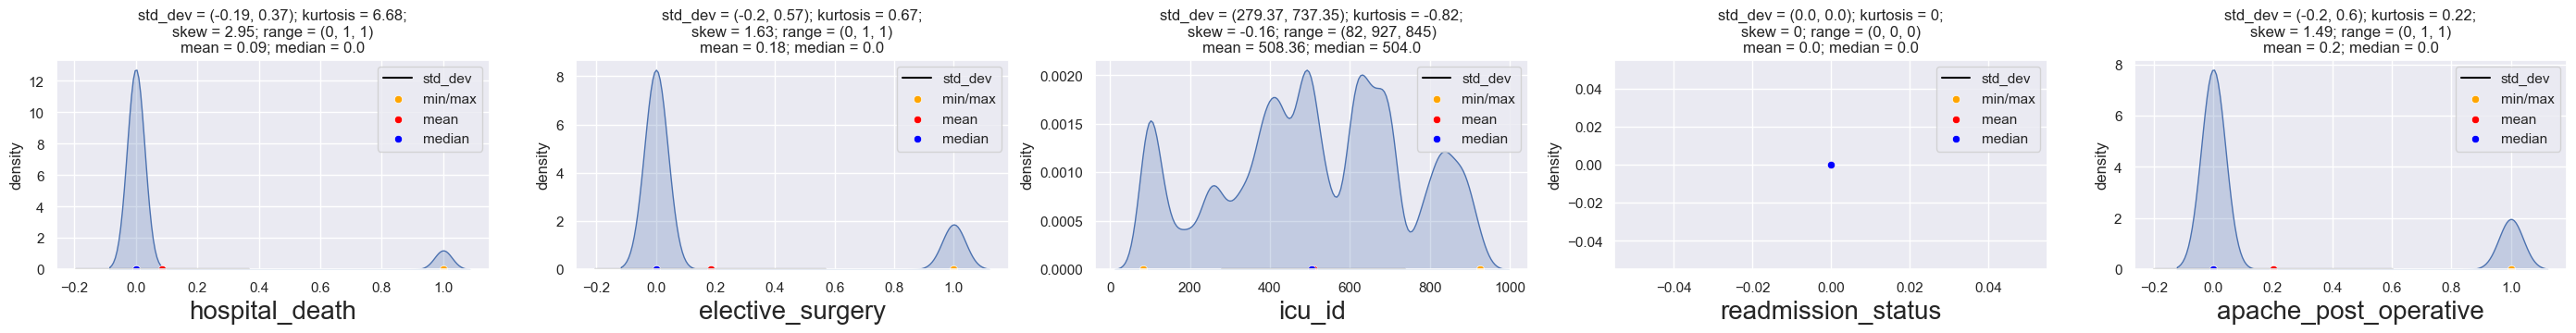

In [82]:
UVA_numeric(df3, integer_value)

In [84]:
df['readmission_status'].value_counts()

0    91713
Name: readmission_status, dtype: int64

In [85]:
# LETS DROP READMISSION STATUS 
df3.drop('readmission_status',inplace=True,axis=1)

df3.drop('icu_id',inplace=True,axis=1)

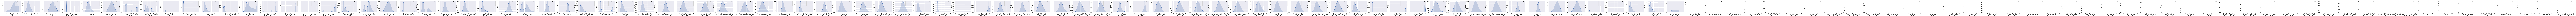

In [92]:
UVA_numeric(df3, Float_value)

In [95]:
df3['arf_apache'].value_counts()

0.000000    89127
1.000000     2548
0.500000       36
0.666667        1
0.333333        1
Name: arf_apache, dtype: int64

In [98]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(df3, Object_values)

In [106]:
# checking out liers
#lets analyze outliers
# Outliers detection 
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))

      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
   

True
True
True


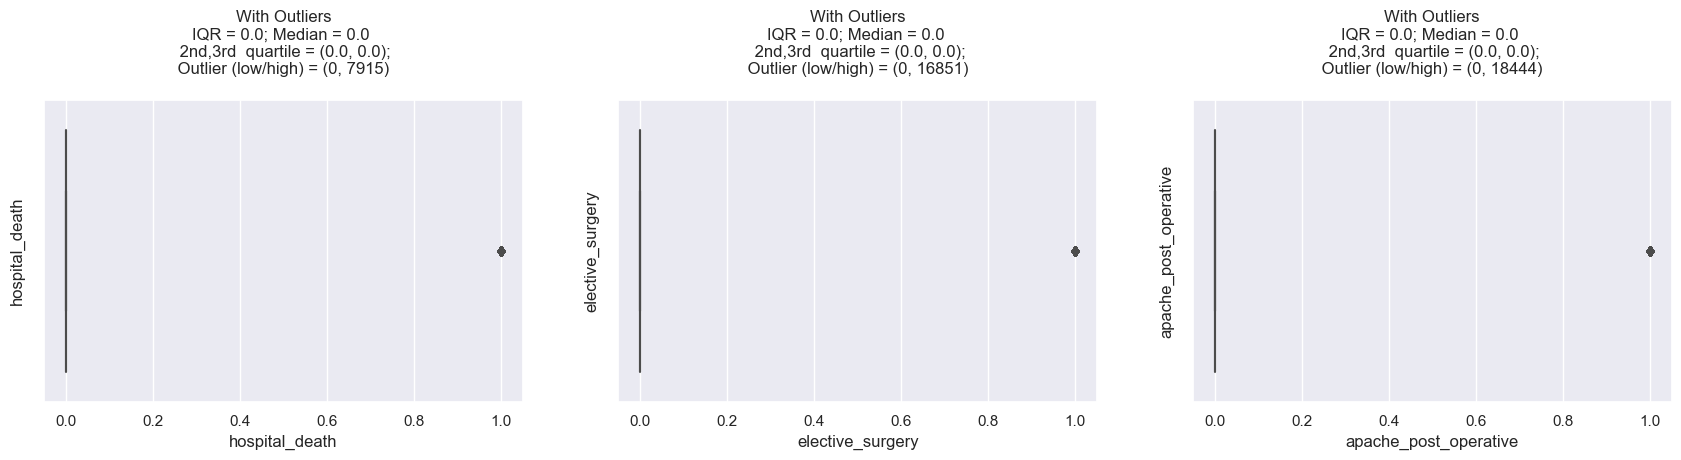

In [104]:
UVA_outlier(df3, integer_value,)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


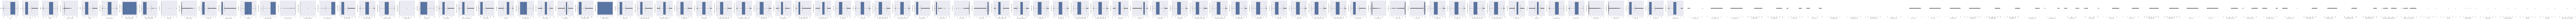

In [107]:
UVA_outlier(df3, Float_value,)

True


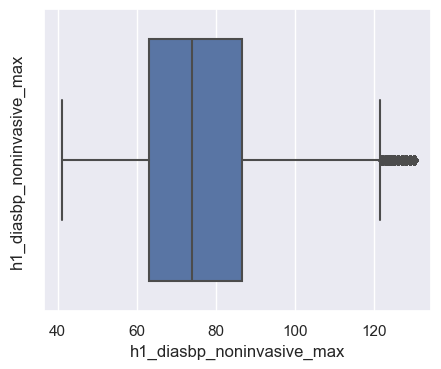

In [119]:
UVA_outlier(final_df, ob,)

In [121]:
# Removing outliers

In [20]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df3)

capping the  encounter_id
capping the  patient_id
capping the  hospital_id
capping the  hospital_death
capping the  age
capping the  bmi
capping the  elective_surgery
capping the  ethnicity
capping the  gender
capping the  height
capping the  hospital_admit_source
capping the  icu_admit_source
capping the  icu_id
capping the  icu_stay_type
capping the  icu_type
capping the  pre_icu_los_days
capping the  readmission_status
capping the  weight
capping the  albumin_apache
capping the  apache_2_diagnosis
capping the  apache_3j_diagnosis
capping the  apache_post_operative
capping the  arf_apache
capping the  bilirubin_apache
capping the  bun_apache
capping the  creatinine_apache
capping the  fio2_apache
capping the  gcs_eyes_apache
capping the  gcs_motor_apache
capping the  gcs_unable_apache
capping the  gcs_verbal_apache
capping the  glucose_apache
capping the  heart_rate_apache
capping the  hematocrit_apache
capping the  intubated_apache
capping the  map_apache
capping the  paco2_apache
c

In [21]:
final_data = final_df.copy()

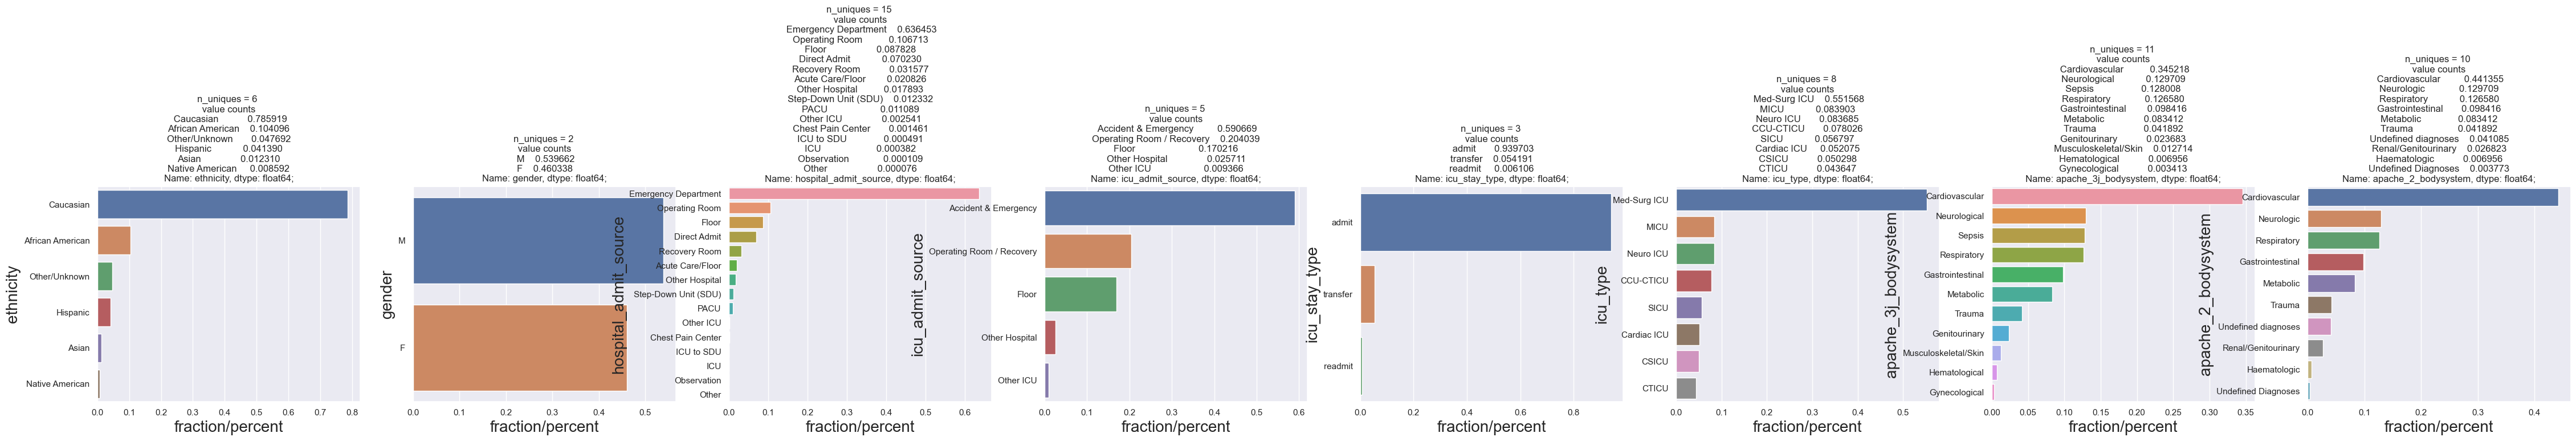

In [122]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(df3, Object_values)

In [22]:
# Lable Encode

In [23]:
#Categorical Encoding
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_df['gender']= label_encoder.fit_transform(final_df['gender'])
 
final_df['gender'].unique()

array([1, 0])

In [24]:
final_df.shape

(91713, 146)

In [25]:
# One Hot encode

In [26]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(final_df['icu_stay_type'])
# Drop column B as it is now encoded
final_df = final_df.drop('icu_stay_type',axis = 1)
# Join the encoded df
final_df = final_df.join(one_hot)  

In [27]:
# Get one hot encoding of columns B
one_hot1 = pd.get_dummies(final_df['icu_admit_source'])
# Drop column B as it is now encoded
final_df = final_df.drop('icu_admit_source',axis = 1)
# Join the encoded df
final_df = final_df.join(one_hot1)  

In [39]:
final_df.shape

(91713, 147)

In [29]:
# Frequency encode
# frequency encode
df_frq_map=final_df['ethnicity'].value_counts().to_dict() 
final_df['ethnicity'] = final_df['ethnicity'].map(df_frq_map)

In [30]:
df_frq_map=final_df['hospital_admit_source'].value_counts().to_dict() 
final_df['hospital_admit_source'] = final_df['hospital_admit_source'].map(df_frq_map)

In [31]:
df_frq_map=final_df['icu_type'].value_counts().to_dict() 
final_df['icu_type'] = final_df['icu_type'].map(df_frq_map)

In [32]:
df_frq_map=final_df['apache_3j_bodysystem'].value_counts().to_dict() 
final_df['apache_3j_bodysystem'] = final_df['apache_3j_bodysystem'].map(df_frq_map)

In [33]:
df_frq_map=final_df['apache_2_bodysystem'].value_counts().to_dict() 
final_df['apache_2_bodysystem'] = final_df['apache_2_bodysystem'].map(df_frq_map)

In [34]:
print("List of Object values",list(final_df.select_dtypes(['object']).columns))

List of Object values []


In [38]:
#Lets drop Id's
final_df.drop('encounter_id',inplace=True,axis=1)
final_df.drop('patient_id',inplace=True,axis=1)
final_df.drop('hospital_id',inplace=True,axis=1)
# LETS DROP READMISSION STATUS 
final_df.drop('readmission_status',inplace=True,axis=1)

final_df.drop('icu_id',inplace=True,axis=1)

In [140]:
final_df.to_csv('Patient_Survival_Fila_Ready.csv',index=False)

In [141]:
final_df.head()

hospital_death   age    bmi  elective_surgery  ethnicity  gender  height  \
0               0  68.0  22.73                 0      72079       1   180.3   
1               0  77.0  27.42                 0      72079       0   160.0   
2               0  25.0  31.95                 0      72079       0   172.7   
3               0  81.0  22.64                 1      72079       0   165.1   
4               0  20.0  25.10                 0      72079       1   188.0   

   hospital_admit_source  icu_type  pre_icu_los_days  weight  albumin_apache  \
0                   8055      4003          0.541667   73.90            2.30   
1                   8055     50586          0.927778   70.20            2.35   
2                  58371     50586          0.000694   95.30            2.40   
3                   9787      4003          0.000694   61.70            2.45   
4                  58371     50586          0.073611   80.85            2.50   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0             0.400        31.0             2.5100     1.000000   
1             0.375         9.0             0.5600     1.000000   
2             0.350        10.0             0.5975     0.800000   
3             0.325        11.0             0.6350     0.600000   
4             0.300        12.0             0.6725     0.733333   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              4.0               6.0                0.0                5.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0              27.40               0.0   
1           145.0              120.0              36.90               0.0   
2           165.0              102.0              31.40               0.0   
3           185.0              114.0              25.90               1.0   
4           170.5               60.0              35.05               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0     37.000000            37.000000         51.0       7.45   
1        46.0     37.000000            37.000000         51.0       7.45   
2        68.0     33.500000            33.500000         96.5       7.42   
3        60.0     30.000000            30.000000        142.0       7.39   
4       103.0     34.333333            34.333333        218.0       7.40   

   resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
0             36.0          134.0         39.3            680.3136   
1             33.0          145.0         35.1            680.3136   
2             37.0          143.0         36.7            680.3136   
3              4.0          141.0         34.8            680.3136   
4             16.0          139.0         36.7            680.3136   

   ventilated_apache  wbc_apache  d1_diasbp_invasive_max  \
0                0.0       14.10               46.000000   
1                1.0       12.70               51.333333   
2                0.0       10.35               56.666667   
3                1.0        8.00               62.000000   
4                0.0        9.45               

In [40]:
final_df.head()

hospital_death   age    bmi  elective_surgery  ethnicity  gender  height  \
0               0  68.0  22.73                 0      72079       1   180.3   
1               0  77.0  27.42                 0      72079       0   160.0   
2               0  25.0  31.95                 0      72079       0   172.7   
3               0  81.0  22.64                 1      72079       0   165.1   
4               0  20.0  25.10                 0      72079       1   188.0   

   hospital_admit_source  icu_type  pre_icu_los_days  weight  albumin_apache  \
0                   8055      4003          0.541667   73.90            2.30   
1                   8055     50586          0.927778   70.20            2.35   
2                  58371     50586          0.000694   95.30            2.40   
3                   9787      4003          0.000694   61.70            2.45   
4                  58371     50586          0.073611   80.85            2.50   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0             0.400        31.0             2.5100     1.000000   
1             0.375         9.0             0.5600     1.000000   
2             0.350        10.0             0.5975     0.800000   
3             0.325        11.0             0.6350     0.600000   
4             0.300        12.0             0.6725     0.733333   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              4.0               6.0                0.0                5.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0              27.40               0.0   
1           145.0              120.0              36.90               0.0   
2           165.0              102.0              31.40               0.0   
3           185.0              114.0              25.90               1.0   
4           170.5               60.0              35.05               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0     37.000000            37.000000         51.0       7.45   
1        46.0     37.000000            37.000000         51.0       7.45   
2        68.0     33.500000            33.500000         96.5       7.42   
3        60.0     30.000000            30.000000        142.0       7.39   
4       103.0     34.333333            34.333333        218.0       7.40   

   resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
0             36.0          134.0         39.3            680.3136   
1             33.0          145.0         35.1            680.3136   
2             37.0          143.0         36.7            680.3136   
3              4.0          141.0         34.8            680.3136   
4             16.0          139.0         36.7            680.3136   

   ventilated_apache  wbc_apache  d1_diasbp_invasive_max  \
0                0.0       14.10               46.000000   
1                1.0       12.70               51.333333   
2                0.0       10.35               56.666667   
3                1.0        8.00               62.000000   
4                0.0        9.45               

In [41]:
final_df.shape

(91713, 147)

In [144]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 147 entries, hospital_death to Other ICU
dtypes: float64(130), int32(1), int64(8), uint8(8)
memory usage: 97.6 MB


# Train and Test Split

In [44]:
# Spliting data train and test 
X= final_df.drop(['hospital_death'],axis=1)
y=final_df['hospital_death']

In [ ]:
X1=selected.drop

<AxesSubplot:xlabel='hospital_death', ylabel='count'>

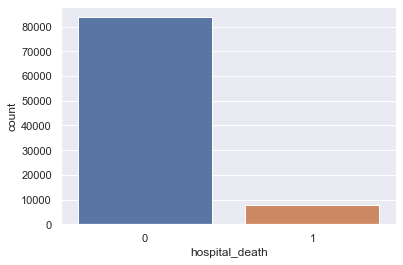

In [45]:
sns.countplot(final_df['hospital_death'])

In [46]:
final_df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [47]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=11, stratify = y)

# Logistics regression

In [65]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred_val = model.predict(xtest)

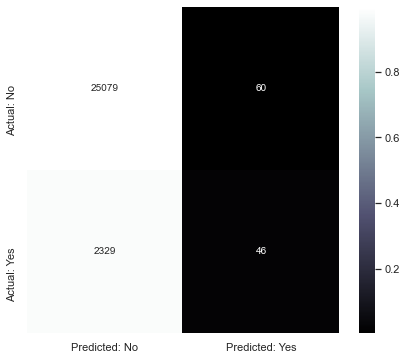

In [90]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [66]:
# accuracy Score
lr=accuracy_score(pred_val,ytest)
lr

0.9131714763393182

In [67]:
from sklearn.metrics import classification_report


In [89]:
print(classification_report(pred_val,ytest))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95     27408
           1       0.02      0.43      0.04       106

    accuracy                           0.91     27514
   macro avg       0.51      0.67      0.50     27514
weighted avg       0.99      0.91      0.95     27514



In [181]:
# Recall Score
print("recall",recall_score(ytest,pred_val))
print("Precission",precision_score(ytest,pred_val))

recall 0.7642105263157895
Precission 0.2708550962542904


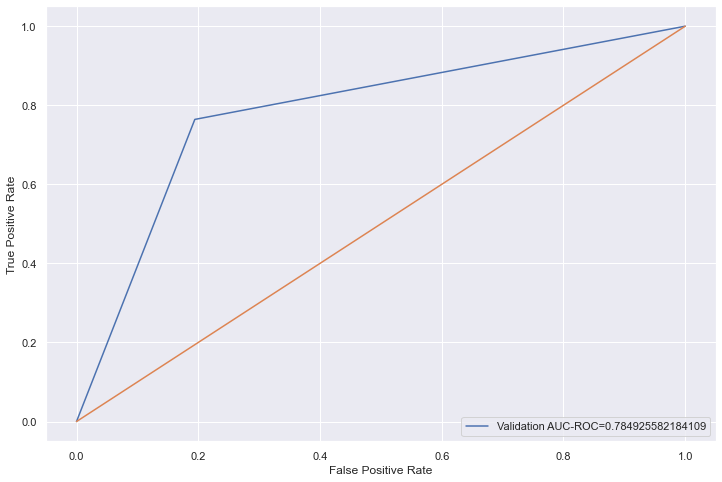

In [182]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred_val) 
auc = roc_auc_score(ytest, pred_val) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

# Cross validation and Hyper Parameter tuning 

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [162]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [163]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [164]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [165]:
y_pred=clf.predict(xtest)
print(confusion_matrix(ytest,y_pred))
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[25084    55]
 [ 2328    47]]
0.913389547139638
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     25139
           1       0.46      0.02      0.04      2375

    accuracy                           0.91     27514
   macro avg       0.69      0.51      0.50     27514
weighted avg       0.88      0.91      0.88     27514



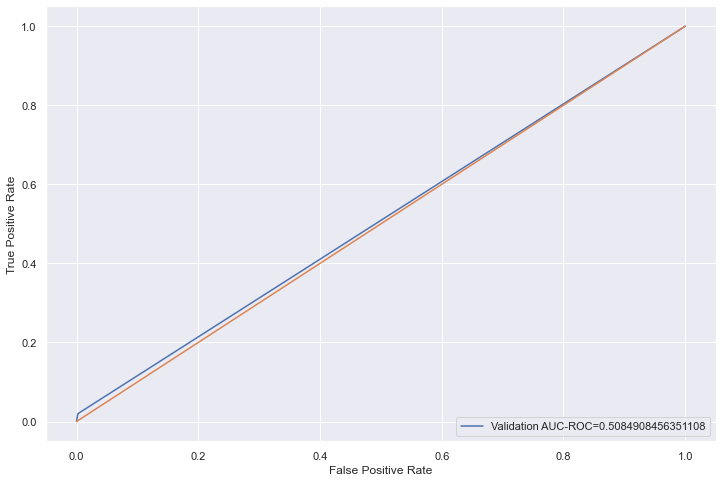

In [166]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,y_pred) 
auc = roc_auc_score(ytest, pred_val) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [183]:
log_class1=LogisticRegression(class_weight={1:2})
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [184]:
clf1=GridSearchCV(log_class1,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf1.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight={1: 2}), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [185]:
y_pred1=clf1.predict(xtest)
print(confusion_matrix(ytest,y_pred1))
print(accuracy_score(ytest,y_pred1))
print(classification_report(ytest,y_pred1))

[[24712   427]
 [ 2075   300]]
0.9090644762666279
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     25139
           1       0.41      0.13      0.19      2375

    accuracy                           0.91     27514
   macro avg       0.67      0.55      0.57     27514
weighted avg       0.88      0.91      0.89     27514



# Decission tree

In [196]:
#Decission tree
from sklearn.tree import DecisionTreeClassifier

In [207]:
dt = DecisionTreeClassifier(max_depth=10,max_features=120)
dt.fit(xtrain,ytrain)
dp = dt.predict(xtest)

In [208]:
print(confusion_matrix(ytest,dp))
print(accuracy_score(ytest,dp))
print(classification_report(ytest,dp))

[[24580   559]
 [ 1718   657]]
0.9172421312786218
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     25139
           1       0.54      0.28      0.37      2375

    accuracy                           0.92     27514
   macro avg       0.74      0.63      0.66     27514
weighted avg       0.90      0.92      0.90     27514



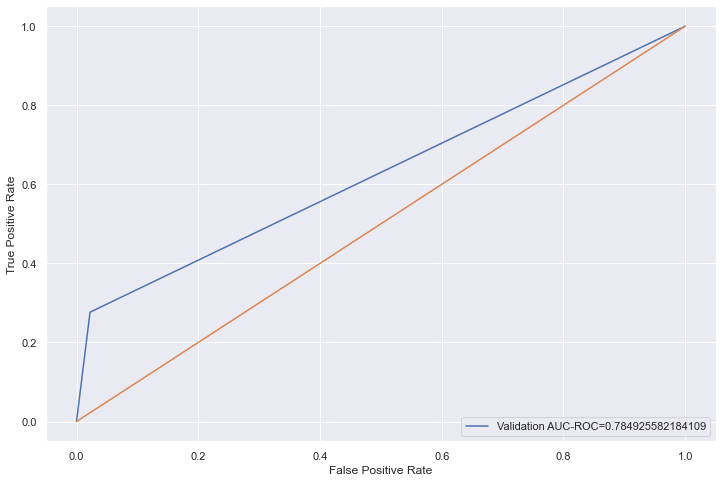

In [221]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,dp) 
auc = roc_auc_score(ytest, pred_val) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [211]:
dt.score(xtrain,ytrain)

0.9454664402872319

In [212]:
dt.score(xtest,ytest)

0.9172421312786218

In [213]:
clf.score(xtrain,ytrain)

0.49923366256322105

In [214]:
clf.score(xtest,ytest)

0.49630135331864056

In [215]:
clf1.score(xtrain,ytrain)

0.5749874027053249

In [216]:
clf.score(xtest,ytest)

0.49630135331864056

In [219]:
model.score(xtrain,ytrain)

0.8085484197573171

In [220]:
model.score(xtest,ytest)

0.8020644035763611

# Random Forest

In [222]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [226]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
rp = rf.predict(xtest)

In [227]:
print(confusion_matrix(ytest,rp))
print(accuracy_score(ytest,rp))
print(classification_report(ytest,rp))

[[24942   197]
 [ 1791   584]]
0.9277458748273606
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25139
           1       0.75      0.25      0.37      2375

    accuracy                           0.93     27514
   macro avg       0.84      0.62      0.67     27514
weighted avg       0.92      0.93      0.91     27514



In [228]:
rf.score(xtrain,ytrain)

0.9999844234333868

In [229]:
rf.score(xtest,ytest)

0.9277458748273606

# GradientBoostingClassifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [232]:
xg = GradientBoostingClassifier().fit(xtrain,ytrain)
xp = xg.predict(xtest)

In [233]:
print(confusion_matrix(ytest,xp))
print(accuracy_score(ytest,xp))
print(classification_report(ytest,xp))

[[24840   299]
 [ 1650   725]]
0.9291633350294396
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.71      0.31      0.43      2375

    accuracy                           0.93     27514
   macro avg       0.82      0.65      0.69     27514
weighted avg       0.92      0.93      0.92     27514



# Ensemble Technique

In [234]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [235]:
#Model 1 - Decision Tree
DT=DecisionTreeClassifier(random_state= 101)
M1_train, M1_test = model_predictions(DT, xtrain, ytrain, xtest)

In [236]:
#Model 2 - Logistic Regression
LR=LogisticRegression()
M2_train, M2_test = model_predictions(LR, xtrain, ytrain, xtest)

In [237]:
xg1 = GradientBoostingClassifier()
M3_train, M3_test = model_predictions(xg1, xtrain ,ytrain, xtest)

In [238]:
Rf = RandomForestClassifier()
M4_train, M4_test = model_predictions(Rf, xtrain ,ytrain, xtest)

In [239]:
#Creating a New train dataframe
train_prediction = {
              'DT': M1_train,
              'LR': M2_train,
              'xg1': M3_train,
              'Rf':M4_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

DT  LR  xg1  Rf
0   0   0    0   0
1   0   0    0   0
2   0   0    0   0
3   1   0    1   1
4   0   0    0   0

In [240]:
#Creating a New test dataframe
test_prediction = {
              'DT': M1_test,
              'LR': M2_test,
              'Xg1': M3_test,
               'Rf':M4_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

DT  LR  Xg1  Rf
0   0   0    0   0
1   1   0    0   0
2   0   0    0   0
3   0   0    0   0
4   0   0    0   0

In [242]:
# Stacker Model
model = RandomForestClassifier()
model.fit(train_predictions, ytrain)
model.score(test_predictions,ytest)

0.8818419713600348

# PCA

In [244]:
#Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
from sklearn.decomposition import PCA
pca = PCA().fit(xtrain)

In [245]:
# transforming the original train and validation set to 350 components

# fit on the training data
pca = PCA(2).fit(xtrain)

# transform both training and validation data
X_train_transformed = pca.transform(xtrain)
X_valid_transformed = pca.transform(xtest)

In [246]:
pm = RandomForestClassifier()

In [247]:
xm = GradientBoostingClassifier()

In [248]:
# fitting the same random forest model on transformed data
pm.fit(X_train_transformed,ytrain)

RandomForestClassifier()

In [249]:
# fitting the same random forest model on transformed data
xm.fit(X_train_transformed,ytrain)

GradientBoostingClassifier()

In [250]:
# predicting for the transformed validation set
pred_2 = pm.predict(X_valid_transformed)

In [251]:
# predicting for the transformed validation set
pred_3 = xm.predict(X_valid_transformed)

In [252]:
# checking the training performance after transformation- Accuracy Score
accuracy_score(pm.predict(X_train_transformed), ytrain)

0.999750774934189

In [254]:
# checking the training performance after transformation- Accuracy Score
accuracy_score(xm.predict(X_train_transformed), ytrain)

0.9137525506627829

In [255]:
# checking the validation performance after transformation- Accuracy Score
accuracy_score(pred_2, ytest)

0.8870029803009377

In [256]:
# checking the validation performance after transformation- Accuracy Score
accuracy_score(pred_3, ytest)

0.9136803082067311

In [258]:
print(classification_report(pred_3, ytest))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     27514
           1       0.00      0.00      0.00         0

    accuracy                           0.91     27514
   macro avg       0.50      0.46      0.48     27514
weighted avg       1.00      0.91      0.95     27514



In [259]:
print(classification_report(pred_2, ytest))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     26460
           1       0.07      0.15      0.09      1054

    accuracy                           0.89     27514
   macro avg       0.52      0.53      0.52     27514
weighted avg       0.93      0.89      0.91     27514



# Handle imbalance data

In [260]:
# Handle imbalance data
from imblearn.combine import SMOTETomek

In [265]:
from collections import Counter
Counter(ytrain)

Counter({0: 58659, 1: 5540})

In [269]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(xtrain,ytrain)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

KeyboardInterrupt: 

In [268]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [299]:
#SMOTE to handle imbalance data

In [270]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = y
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=83798 (50.000%)
Class=1, n=83798 (50.000%)


In [271]:
X.shape

(167596, 146)

In [272]:
y.value_counts()

0    83798
1    83798
Name: hospital_death, dtype: int64

In [280]:
# Splitting the data into Train and Validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11, stratify = y)

In [281]:
y_test.value_counts()

0    16760
1    16760
Name: hospital_death, dtype: int64

In [282]:
y_train.value_counts()

0    67038
1    67038
Name: hospital_death, dtype: int64

In [286]:
model_new = LogisticRegression(penalty='l2',solver='newton-cg', class_weight='balanced')
model_new.fit(X_train,y_train)
pred_val_new = model_new.predict(X_test)

In [287]:
print(confusion_matrix(y_test,pred_val_new))
print(accuracy_score(y_test,pred_val_new))
print(classification_report(y_test,pred_val_new))

[[11709  5051]
 [ 5564 11196]]
0.6833233890214797
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     16760
           1       0.69      0.67      0.68     16760

    accuracy                           0.68     33520
   macro avg       0.68      0.68      0.68     33520
weighted avg       0.68      0.68      0.68     33520



# RandomForestClassifier()

In [291]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
rp1 = rf1.predict(X_test)

# Final Report

In [292]:
print(confusion_matrix(y_test,rp1))
print(accuracy_score(y_test,rp1))
print(classification_report(y_test,rp1))

[[16058   702]
 [  743 16017]]
0.9568914081145584
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16760
           1       0.96      0.96      0.96     16760

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520



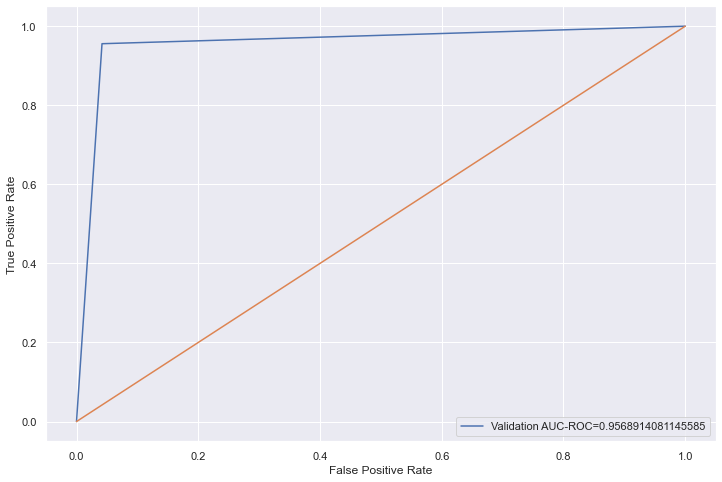

In [295]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,rp1) 
auc = roc_auc_score(y_test, rp1) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [297]:
rf1.score(X_train,y_train)

1.0

In [298]:
rf1.score(X_test,y_test)

0.9568914081145584

# Feature Selection with random Forest

In [50]:
import pandas as pd
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [52]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestClassifier())

In [54]:
z=sel.get_support()

In [55]:
len(z)

146

In [57]:
selected_feat= xtrain.columns[(sel.get_support())]
len(selected_feat)

56

In [58]:
print(selected_feat)

Index(['age', 'bmi', 'pre_icu_los_days', 'weight', 'apache_3j_diagnosis',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'map_apache', 'ph_apache',
       'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min',
       'h1_resprate_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max',
       'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max',
       'd1_hco3_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_wbc_max', 'd1_wbc_min', 'd1_arterial_pco2_max',
       'd1_arterial_ph_max', 'd1_arterial_ph

In [60]:
df[['Name', 'Qualification']]

AttributeError: module 'pandas' has no attribute 'series'

In [83]:
selected_new = final_df[['age', 'bmi', 'pre_icu_los_days', 'weight', 'apache_3j_diagnosis',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'map_apache', 'ph_apache',
       'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min',
       'h1_resprate_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max',
       'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max',
       'd1_hco3_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_wbc_max', 'd1_wbc_min', 'd1_arterial_pco2_max',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob','hospital_death']]

In [84]:
selected_new.shape

(91713, 57)

In [85]:
X1=selected_new.drop('hospital_death',axis=1)
y1=selected_new['hospital_death']

In [86]:
# Splitting the data into Train and Validation set
x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3, random_state=11, stratify = y)

In [91]:
lr_new = LogisticRegression()
lr_new.fit(x_train,y_train)
pred_val_new = lr_new.predict(x_test)

In [92]:
print(confusion_matrix(y_test,pred_val_new))
print(accuracy_score(y_test,pred_val_new))
print(classification_report(y_test,pred_val_new))

[[24939   200]
 [ 2029   346]]
0.9189866976811805
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     25139
           1       0.63      0.15      0.24      2375

    accuracy                           0.92     27514
   macro avg       0.78      0.57      0.60     27514
weighted avg       0.90      0.92      0.90     27514



In [96]:
mi = RandomForestClassifier()
mi.fit(x_train,y_train)
rm = mi.predict(x_test)

In [97]:
print(confusion_matrix(y_test,rm))
print(accuracy_score(y_test,rm))
print(classification_report(y_test,rm))

[[24892   247]
 [ 1727   648]]
0.9282547066947736
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.72      0.27      0.40      2375

    accuracy                           0.93     27514
   macro avg       0.83      0.63      0.68     27514
weighted avg       0.92      0.93      0.91     27514



In [100]:
m2 = GradientBoostingClassifier().fit(x_train,y_train)
mr = m2.predict(x_test)

In [101]:
print(confusion_matrix(y_test,mr))
print(accuracy_score(y_test,mr))
print(classification_report(y_test,mr))

[[24818   321]
 [ 1662   713]]
0.9279276004942938
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.69      0.30      0.42      2375

    accuracy                           0.93     27514
   macro avg       0.81      0.64      0.69     27514
weighted avg       0.92      0.93      0.91     27514

